# Assignment 3: Bootstrap, confidence intervals & standard errors

## Learning Outcomes:
In this homework we will look at Estimates, Bootstrap, Confidence intervals, and Standard error.
## Dataset 
The data set run10sample.csv contains data from random sample of 25 runner of the 16923 competitor in the 2012 Cherry blossom run (cherryblossom.org). The variables in the file are: 

- Place:  Finishing position. Separate positions are provided for each gender.
- time: The total run time (in min) 
- Pace: The listed pace (/mile) for each runner.
- Age: Age.
- Gender: Gender.
- Location: Hometown city. 
- State: Hometown state 
- divPlace: Age Division place, also broken up by gender.
- divTot: Total number of people in the division (again, also split by gender).

The data set run10.csv contains the data from all 16923 competitors, so you can also analyze the whole population. 

## Preliminaries
Set up the environment by importing pandas, numpy, scipy, and matplotlib. 

In [74]:
import pandas as pd
import numpy as np
import scipy as ss
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

## Task 1: Analyzing a sample from the  population (12pt)
In this task you will use the sample of runners that you got. 
### Question 1.1 (4pt)
What was the mean finishing time in the random sample?

In [75]:
sample_df = pd.read_csv("run10sample.csv")

sample_df['time'].mean()



np.float64(98.1504)

### Question 1.2 (4pt)
What is the number of men and women in your sample (tip: use groupby and size or count)?

In [76]:
grouped = sample_df.groupby('gender')
#grouped.groups.keys() 
print(grouped.size()['M'])
print(grouped.size()['F'])

11
14


### Question 1.3 (4pt)
What was the mean finishing time when you split the sample up by gender (see Homework 2, task 4)? 

In [77]:
timeMean = df['time'].groupby(df['gender']).mean()
print(timeMean)


gender
F    99.015584
M    88.426391
Name: time, dtype: float64


## Task 2: Resampling from the population (42 Points)
In this task you will have access to the data from the whole population to determine how much confidence you should have in the numbers you obained in Task 1.The dataset run10.csv contain the total population of 16923 competitors in the 2012 Cherry blossom run (cherryblossom.org). Having the whole population gives us the opportunity to check how good our sample estimate is. 

### Question 2.1 (10pt)

What is the mean finishing time in the whole population of runners? Written answer: How much does it differ from the mean finishing time of the sample analyzed in Task 1? Can this difference be explained by the fact that our sample differs from the population in terms of gender distribution? How about age? Knowing these differences, how could we have improved our estimate?

In [78]:
df = pd.read_csv("run10.csv")

print(f"Sample mean time: {sample_df['time'].mean()}")
print(f"Population mean time: {df['time'].mean()}")

df_gender_grouped = df.groupby('gender')
print(f"Population number of male: {df_gender_grouped.size()['M']}")
print(f"Population number of females: {df_gender_grouped.size()['F']}")

print(f"Population age mean is: {df['age'].mean()}")
print(f"Population age mean is: {sample_df['age'].mean()}")



Sample mean time: 98.1504
Population mean time: 94.51597470897596
Population number of male: 7191
Population number of females: 9732
Population age mean is: 35.52106600484548
Population age mean is: 37.04


This differs from the mean finising time by 4 seconds. Yes, this could be because our sample differs from the gender or age distribution. If we knew the differences in gender distribution, we could take the mean time of men and women, then reweight our estimate. Same thing for age, if we have the difference in mean age, we could reweight our guess.

### Question 2.2 (10pt)
Write a function **bootstrap**, which takes a data series (data) as an input and then performs a bootstrap. The function should take numIter samples from the data (with replacement) of size N. It should then calculate the statistics defined in fcn for each iteration and record it in a numpy-array, which it should then return.
In this task we will use the bootstrap function to resample from the population. 

Input arguments 
- data: data series to resample
- N: Sample size for each iteration 
- fcn: function to apply to the sample to get the statistics
- numIter: Number of resamples (should default to 1000) 

Output argument: 
- Numpy array of size numIter that contains the estimates of the statistic (i.e. the bootstrap sample)

Hints: 
- You can use np.random.choice to draw a sample (with or without replacement) from a data series 

In [79]:
def bootstrap(data, N, fcn = np.sqrt, numIter=1000):
    Nsamp  = np.zeros(numIter)

    iter = 1 # iteration number
    while iter < numIter:
        #print(f"iteration {iter}")
        Nsamp[iter] = fcn(np.random.choice(data, size = N, replace = True))
        
        
        iter = iter + 1
    return Nsamp

### Question 2.3 (8pt)
Call the bootstrap function from Question 2 with the finishing time of whole population as the data series, mean as the statistic, and a sample size of 25. This will give you a sampling distribution. Plot a histogram of the sampling distribution – make sure your x-axis and y-axis are labeled and a caption added. Report the mean and the standard deviation of the sampling distribution. 

Written answer: 
Is the mean of the sampling distribution close to the mean of the population? Why? 
Is the standard deviation close of the sampling distribution to the standard deviation of the population? Why not?

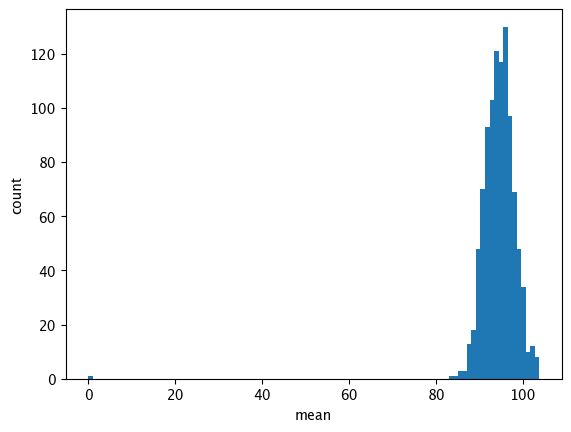

4.390170771516133
15.921655434555316


In [80]:
sample_means = bootstrap(df['time'], 25, np.mean)
plt.hist(sample_means, bins = 100)
plt.xlabel("mean") 
plt.ylabel("count")
plt.show()

std_dev = np.std(sample_means)
print(std_dev)

std_dev_pop = np.std(df['time'])
print(std_dev_pop)

Yes, the mean of the sampling distributions are close to the mean of the population. This is because the sample distribution draws from the population. No the standard deviation of the sampling distribution is not similar to the standard deviation of the population. This is because we are taking the means from the population which is the averages of times instead of just the deviation of times.

### Question 2.4 (8pt)
Call your bootstrap function again as in question 3, this time increasing the sample size first to 50, and then to 100. Which of the values (mean, standard deviation) of the sampling distribution changes most and why? 

In [81]:
sample_means = bootstrap(df['time'], 100, np.mean)

print(sample_means.mean())
std_dev = np.std(sample_means)
print(std_dev)


94.4583891
3.4075819442254347


Standard deviation is reduced for every increase in sample size. The mean stays about the same.

### Question 2.5 (6pt)
Calculate the predicted standard error of the sample mean from the population standard deviation and the same size for  N=25, N=50, and N=100. Write a line of code for each sample size that prints the answer in a full sentence. Written answer: Do these match up with the SEMs that you got from question 4? 

In [82]:
sample_sizes = [25, 50, 100]

# Calculate and print the SEM for each sample size
for N in sample_sizes:
    sample_means = bootstrap(df['time'], N, np.mean)
    std_dev = np.std(sample_means)

    sem = std_dev / (N ** 0.5)  # Calculate SEM
    print(f"The predicted standard error of the sample mean for N={N} is {sem:.2f}.")

The predicted standard error of the sample mean for N=25 is 0.88.
The predicted standard error of the sample mean for N=50 is 0.53.
The predicted standard error of the sample mean for N=100 is 0.34.


The values are not the same. However the decreasing error for an increasing sample size stays the same.

## Task 3: Calculating confidence intervals (24pt) 
### Question 3.1 (8pt)
Write a function (confidenceInt) that constructs a confidence interval from sampling distribution using the percentile method (see lecture). 	

Input arguments 
- data: Sample of estimates – usually this is output from a resampling or bootstrap function (from task 2 Q2)
- prec: What Confidence interval in percent? 95= 95% confidence interval <br/>
Output argument: 
- A list with 2 values: the lower and upper bound of the interval. 

Tip: Use np.percentile to get a specific percentile of the data. The lower bound of a 95% confidence interval is the (100-95)/2=2.5 percentile. 

In [83]:
def confidenceInt(data, prec):
    lower_percentile = (100 - prec) / 2
    upper_percentile = 100 - lower_percentile

    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)

    return [lower_bound, upper_bound]

### Question 3.2 (8pt)
Determine the confidence 95% interval for the mean estimate of your sample of 25? Use your bootstrap function (from Task 2.2) to resample 1000 artificial samples of 25 from your population. Then use your confidenceInt function to get the 95% confidence interval.  Report the interval. 


### Question 3.3  (8pt)
Repeat the plotting of the histogram from task 2.3 – but this time plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline. Make sure that the graph has x- and y-labels and a caption.

## Task 4: Bootstraping from the sample (22pt)
Now let's forget that you ever had the data from the whole population. Say, you only have your initial sample of 25 participants. How would you get an estimate of the confidence interval of the mean of the sample? 
### Question 4.1 (8pt)
Load the sample stored in run10sample.csv. Now call the bootstrap function with the sample data. In each loop the function should resampling 25 data points from 25 data points (with replacement!). You have now taken 1000 bootstrap samples. Report the mean of the bootstrap distribution, the standard deviation of the the bootstrap distribution, and the 95% confidence interval for your sample mean. 

### Question 4.2 (8pt)
Plot of the histogram of your bootstrap distribution –plot the lower and upper bound of the confidence interval as a vertical line – see plt.axvline (see homework 3). Plot the true population mean (Task 2.1) as a red vertical line. Make sure that the graph has x- and y-labels. 

### Question 4.3: (6pt)
Written answer: Does the 95% confidence interval include the true population mean? Does it include the mean value from last year’s cherry blossom run (101min)? Is there statistical evidence from your sample of N=25, that the race times have gotten faster from last year? 